# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing Dataset**

In [ ]:
dataset = pd.read_csv("/content/heart.csv")

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Analysing Dataset**

In [ ]:
print('''age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect''')

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
print(dataset["target"].describe(), "\n")
print(dataset["target"].unique())

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64 

[1 0]


In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [ ]:
y = dataset["target"]

target_temp = dataset.target.value_counts()

print(target_temp)

1    165
0    138
Name: target, dtype: int64


In [ ]:
print("Patients without heart problems: "+str(target_temp[0]))
print("Patients with heart problems: "+str(target_temp[1]))

Patients without heart problems: 138
Patients with heart problems: 165


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
print(X_train.shape)

print(X_test.shape)

Y_train.shape

Y_test.shape

(242, 13)
(61, 13)


(61,)

# **Model Fitting**

# **1) Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=1000)

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(61,)

**Accuracy Score**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("Accuracy score using Logistic Regression is: "+str(score_lr))

Accuracy score using Logistic Regression is: 85.25


**Confusion Matrix**

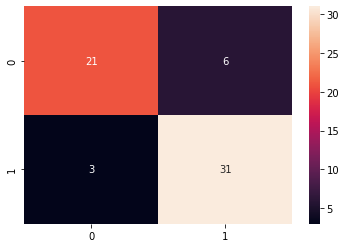

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test, Y_pred_lr)
sns.heatmap(cm, annot=True)

# **2) Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(1000):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
print(Y_pred_dt.shape)

(61,)


**Accuracy Score**

In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("Accuracy score using Decision Tree is: "+str(score_dt))

Accuracy score using Decision Tree is: 81.97


**Confusion Matrix**

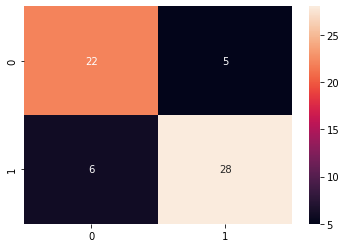

In [ ]:
cm=confusion_matrix(Y_test,Y_pred_dt)
sns.heatmap(cm,annot=True)

**Decision Tree Visualiser**

In [ ]:
from sklearn.tree import export_graphviz
fn=['sex', 'age', 'chest pain', 'resting blood pressure', 'cholestoral', 'fasting blood sugar', 'resting ecg', 'maximum heart rate', 'exercise induced angina', 'oldpeak', 'slope', 'ca', 'thalassemia']

export_graphviz(
    dt,
    out_file='dtree.dot',
    feature_names = fn,
    rounded=True,
    filled=True);

In [ ]:
! dot -Tpng dtree.dot -o dtree.png

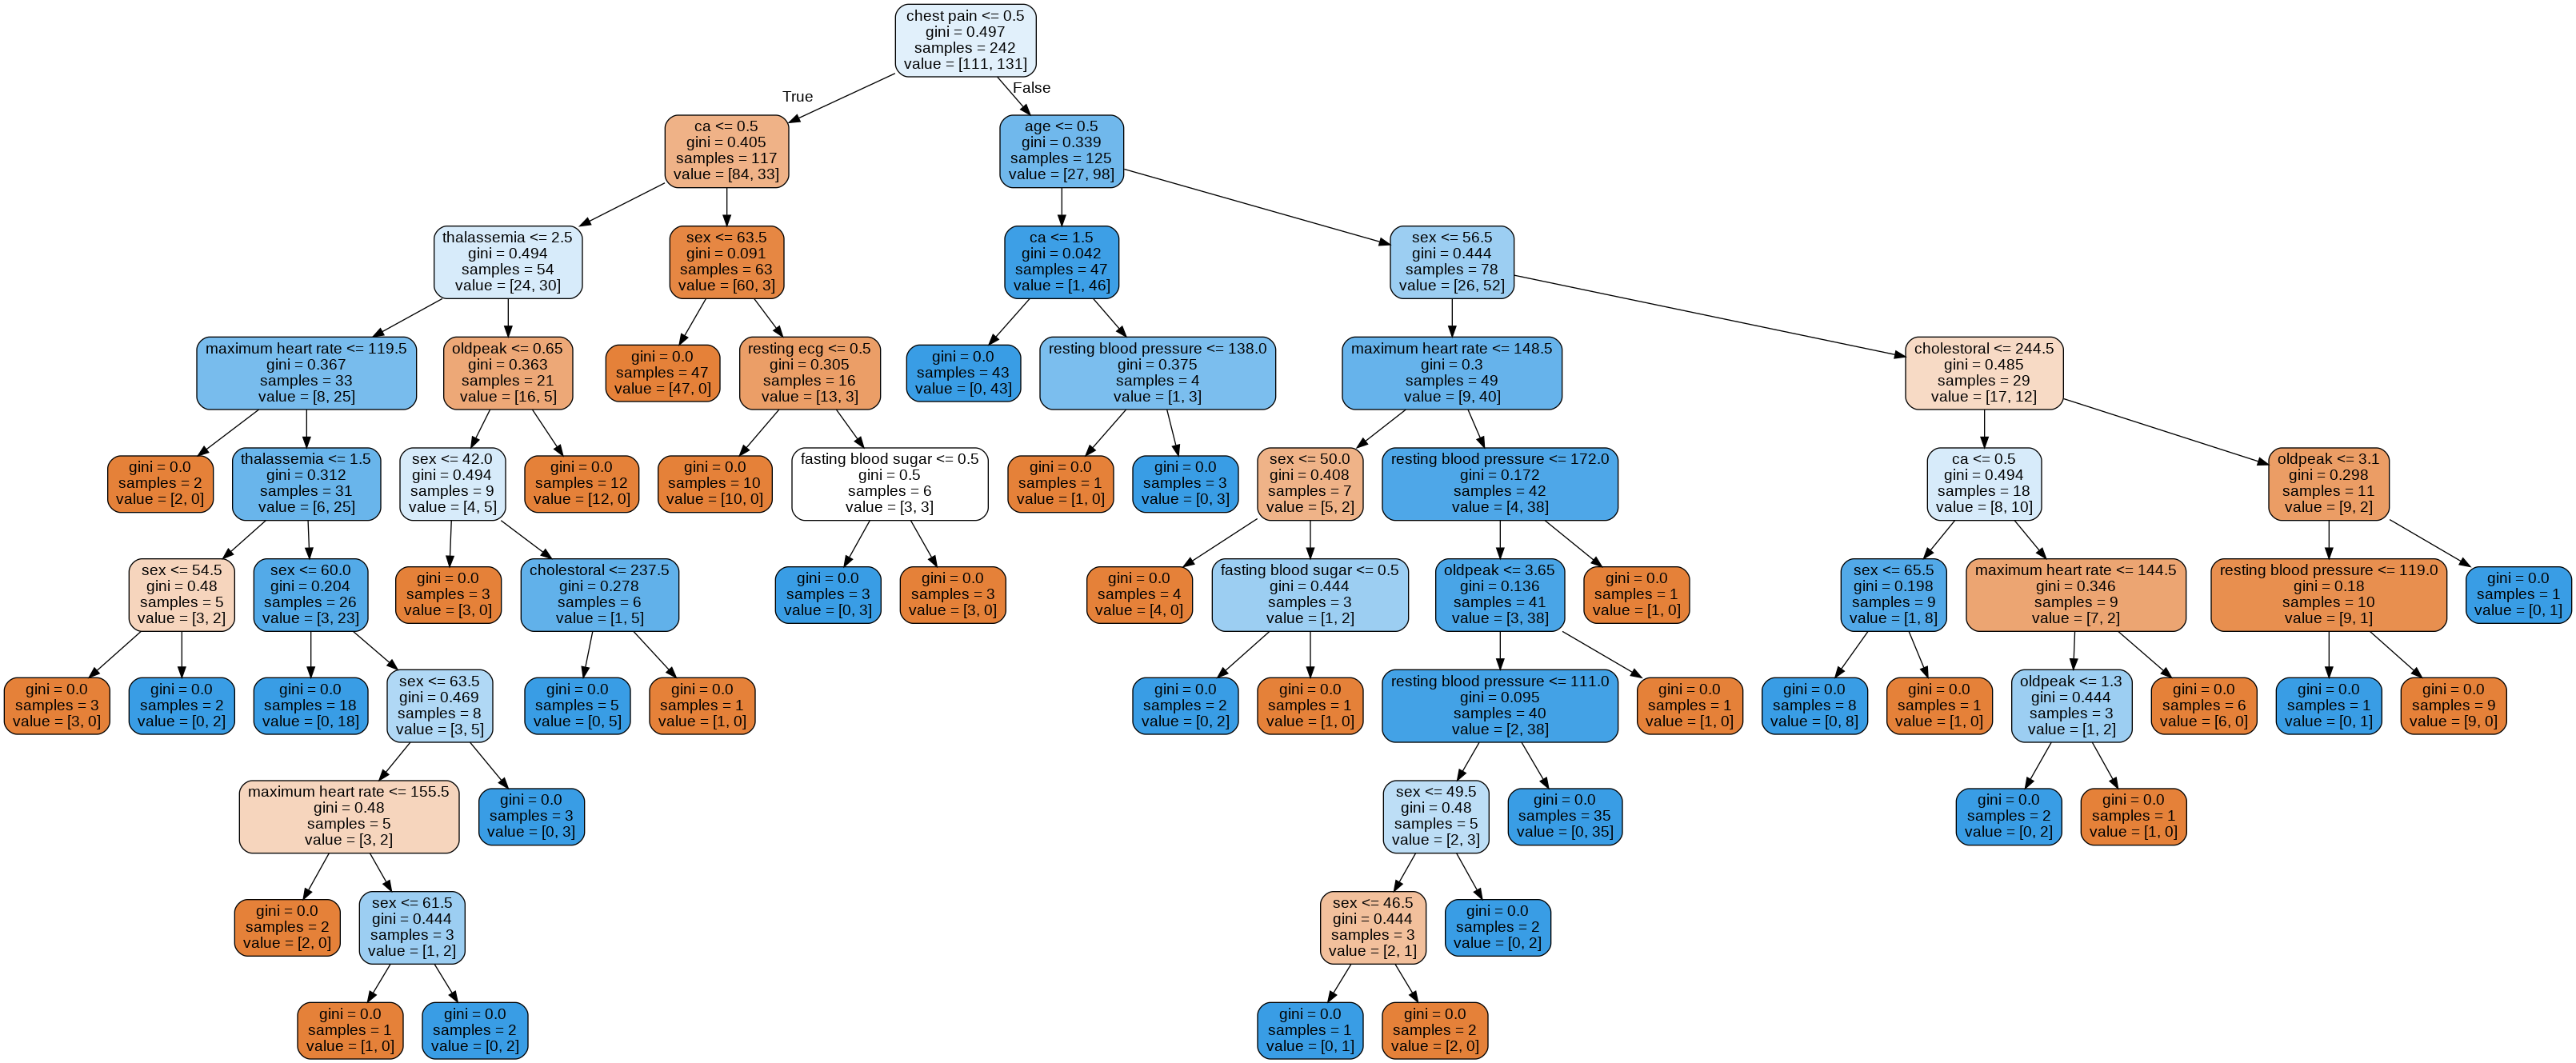

In [ ]:
from IPython.display import Image
Image(filename='dtree.png')

# **3) Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(500):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(61,)

**Accuracy Score**

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("Accuracy score using Random Forest is: "+str(score_rf))

Accuracy score using Random Forest is: 90.16


**Confusion Matrix**

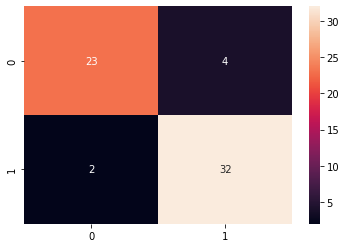

In [ ]:
cm=confusion_matrix(Y_test, Y_pred_rf)
sns.heatmap(cm,annot=True)

# **Comparison of all models**

In [ ]:
scores = [score_lr, score_dt, score_rf]
algorithms = ["Logistic Regression","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("Accuracy score using "+algorithms[i]+" is: "+str(scores[i]))

Accuracy score using Logistic Regression is: 85.25
Accuracy score using Decision Tree is: 81.97
Accuracy score using Random Forest is: 90.16


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


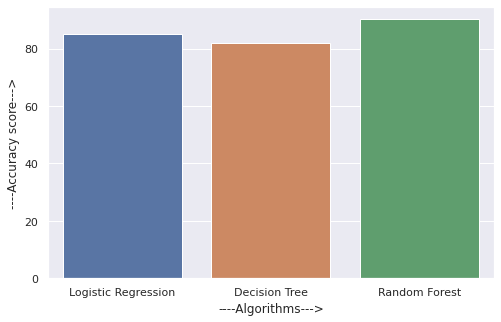

In [ ]:
sns.set(rc={'figure.figsize':(8,5)})
plt.xlabel("----Algorithms--->")
plt.ylabel("----Accuracy score--->")

sns.barplot(algorithms,scores)

Turns out random forest has better accuracy score as compared to other algorithms